<a href="https://colab.research.google.com/github/ameyaoka/ml-notebooks/blob/main/Internship_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 30.1 MB/s eta 0:00:00


In [2]:
import  pandas as pd
import numpy as np

In [3]:
from datasets import load_dataset

dataset = load_dataset("Ammok/apple_stock_price_from_1980-2021")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
        num_rows: 10468
    })
})

In [5]:
train_df = dataset['train'].to_pandas()
train_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


### Definitions :
1. Open: The price at which a stock begins trading on a given day.
2. Close: The price at which a stock closes trading on a given day.
3. Low: The lowest price that a stock trades for during a given day.
High: The highest price that a stock trades for during a given day.

4. Adjusted close: The closing price of a stock adjusted for corporate actions such as dividends, stock splits, or new share issuance.

5. Volume: The number of shares of a stock that are traded during a given day.




In [6]:
train_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [8]:
train_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


1. There are 10,468 observations in the dataset.
2. A high standard deviation in a tabular data means that the values are generally far from the mean
3.  The minimum and maximum values for Open, High, Low, Close, and Adj Close prices are significantly different,   indicating a large range of values for these variables.


### Data preprocessing:

1. Here we are going to split the data, Since the data is time series, we will take the first 90% of data as training and the last 10% as test data.

In [9]:

train_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no missing values in the dataset.

In [10]:
train_df.duplicated().sum()

0


There are no duplicate values in the dataset.

In [11]:
# Convert the date column to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Print the updated data types of the columns
print(train_df.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [12]:
print(train_df['Date'].dtype)

datetime64[ns]


- Drop rows with missing values

In [13]:
train_df.dropna(inplace=True)

# EXPLORATORY DATA ANALYSIS

In [14]:
import matplotlib.pyplot as plt

In [15]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [16]:
fig = make_subplots(rows=6, cols=1,
                    subplot_titles=("Opening Price", "Closing Price", "Highest Price",
                                    "Lowest Price", "Adjusted Closing Price", "Volume"))

fig.add_trace(go.Scatter(x=train_df.index, y=train_df["Open"]), row=1, col=1)
fig.add_trace(go.Scatter(x=train_df.index, y=train_df["Close"]), row=2, col=1)
fig.add_trace(go.Scatter(x=train_df.index, y=train_df["High"]), row=3, col=1)
fig.add_trace(go.Scatter(x=train_df.index, y=train_df["Low"]), row=4, col=1)
fig.add_trace(go.Scatter(x=train_df.index, y=train_df["Adj Close"]), row=5, col=1)
fig.add_trace(go.Scatter(x=train_df.index, y=train_df["Volume"]), row=6, col=1)
fig.update_layout(showlegend=False, height=1200, width=800)
fig.show()

<ipython-input-42-e459dc2b104e>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



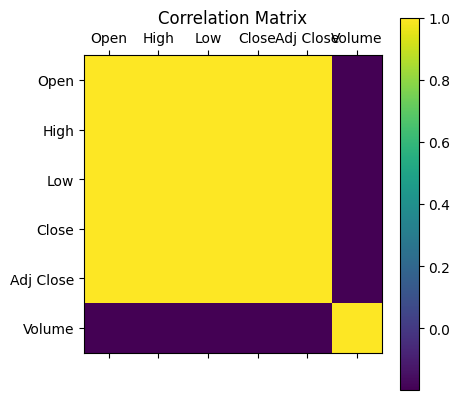

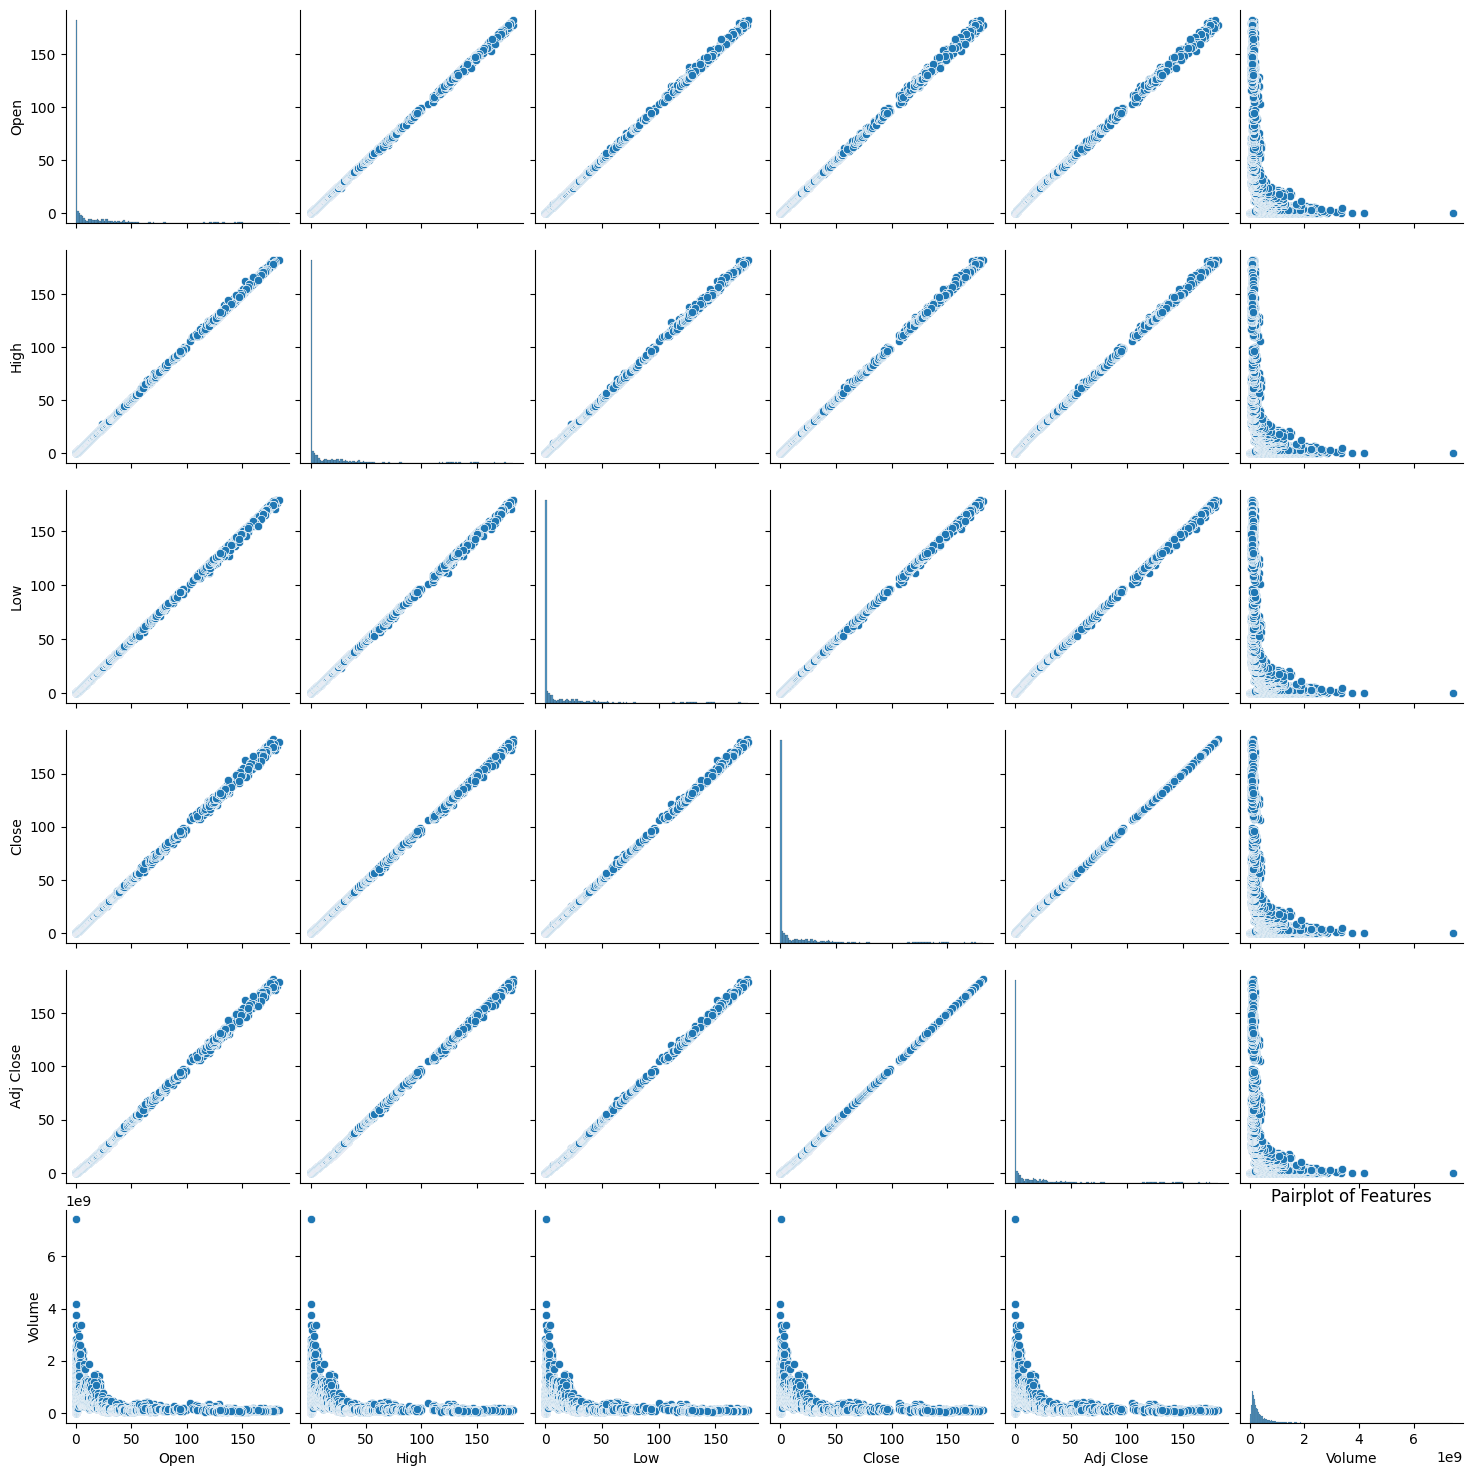

In [42]:
import seaborn as sns
# Pairplot of features
import pandas as pd
import matplotlib.pyplot as plt


# Compute correlation matrix
corr_matrix = train_df.corr()

# Visualize correlation matrix using a heatmap
plt.matshow(corr_matrix)

# add labels and title
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix')

# display the plot
sns.pairplot(data=train_df, vars=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
plt.title('Pairplot of Features')
plt.show()

1. The open and high prices are positively correlated, meaning that they tend to move in the same direction.

2. The low and close prices are also positively correlated.

3. This suggests that the open, high, and low prices are more likely to move together.


### Volume analysis

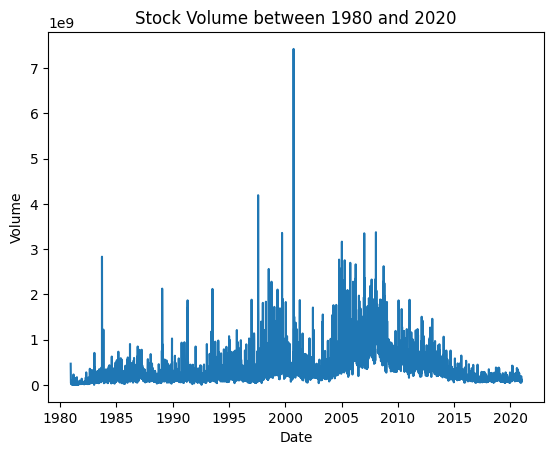

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter the DataFrame by year range
start_year = 1980
end_year = 2020
mask = (train_df['Date'].dt.year >= start_year) & (train_df['Date'].dt.year <= end_year)
df_filtered = train_df.loc[mask]

# Plot the volume column
plt.plot(df_filtered['Date'], df_filtered['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Volume between {} and {}'.format(start_year, end_year))
plt.show()

### Volume in decades


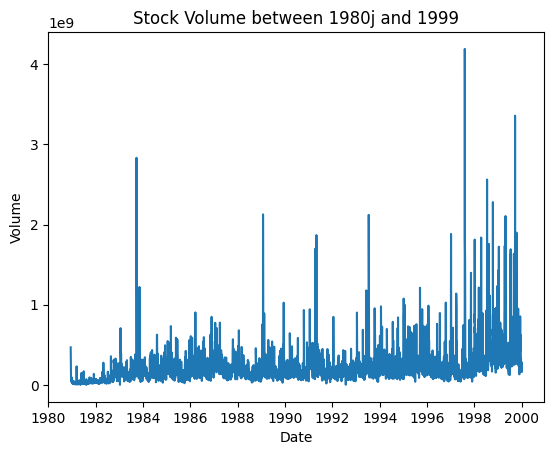

In [19]:
# Filter the DataFrame by year range
start_year = 1980j
end_year = 1999
mask = (train_df['Date'].dt.year >= start_year) & (train_df['Date'].dt.year <= end_year)
df_filtered = train_df.loc[mask]

# Plot the volume column
plt.plot(df_filtered['Date'], df_filtered['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Volume between {} and {}'.format(start_year, end_year))
plt.show()


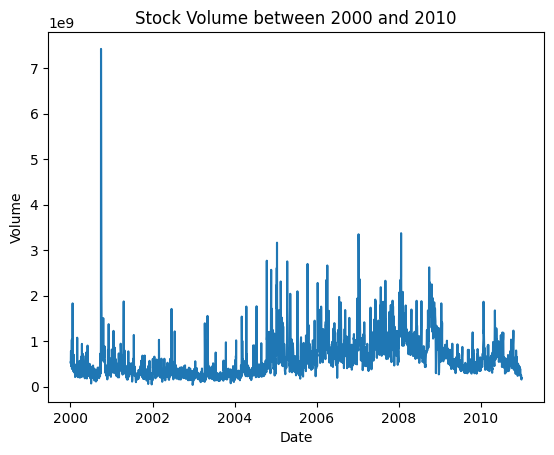

In [20]:

start_year = 2000
end_year = 2010
mask = (train_df['Date'].dt.year >= start_year) & (train_df['Date'].dt.year <= end_year)
df_filtered = train_df.loc[mask]

# Plot the volume column
plt.plot(df_filtered['Date'], df_filtered['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Volume between {} and {}'.format(start_year, end_year))
plt.show()


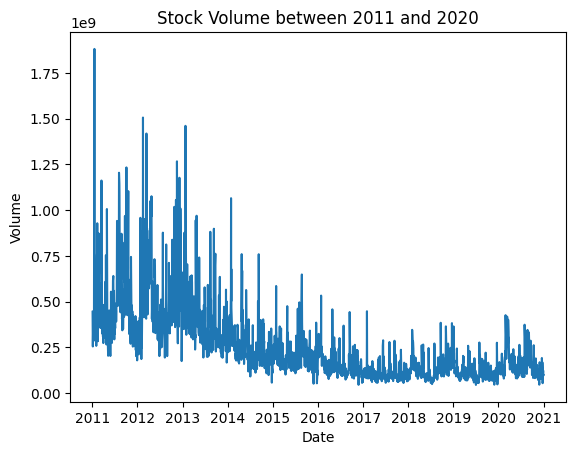

In [21]:

start_year = 2011
end_year = 2020
mask = (train_df['Date'].dt.year >= start_year) & (train_df['Date'].dt.year <= end_year)
df_filtered = train_df.loc[mask]

# Plot the volume column
plt.plot(df_filtered['Date'], df_filtered['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Volume between {} and {}'.format(start_year, end_year))
plt.show()



The biggest interest in apple actions was in January 2011 then it started to decrease


In [22]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler


To prepare data for LSTM, you can use data scaling techniques such as MinMaxScaler. MinMaxScaler scales the data within a given range, usually between 0 and 1, and transforms the data by scaling features to a given range without changing the shape of the original distribution1

In [24]:

# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train_df['Close'].values.reshape(-1, 1))

### splitting data

In [25]:
# Split data into training and testing sets
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[1:training_data_len, :]
test_data = scaled_data[training_data_len:, :]

In [26]:
# Create training data
def create_training_data(data, look_back):
    X_train, y_train = [], []
    for i in range(look_back, len(data)):
        X_train.append(data[i-look_back:i, 0])
        y_train.append(data[i, 0])
    return np.array(X_train), np.array(y_train)

In [27]:
look_back = 60
X_train, y_train = create_training_data(train_data, look_back)

In [28]:
# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [43]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [44]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
# Train model
model.fit(X_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
260/260 [==============================] - 33s 99ms/step - loss: 5.2172e-05
Epoch 2/25
260/260 [==============================] - 26s 99ms/step - loss: 1.4069e-05
Epoch 3/25
260/260 [==============================] - 25s 96ms/step - loss: 1.5466e-05
Epoch 4/25
260/260 [==============================] - 26s 101ms/step - loss: 1.2487e-05
Epoch 5/25
260/260 [==============================] - 25s 96ms/step - loss: 1.4678e-05
Epoch 6/25
260/260 [==============================] - 28s 106ms/step - loss: 1.1224e-05
Epoch 7/25
260/260 [==============================] - 25s 97ms/step - loss: 1.3369e-05
Epoch 8/25
260/260 [==============================] - 26s 98ms/step - loss: 1.3071e-05
Epoch 9/25
260/260 [==============================] - 26s 99ms/step - loss: 1.1751e-05
Epoch 10/25
260/260 [==============================] - 26s 98ms/step - loss: 1.2334e-05
Epoch 11/25
260/260 [==============================] - 26s 98ms/step - loss: 1.2971e-05
Epoch 12/25
260/260 [==================

In [46]:

# Create testing data
test_data_len = len(test_data) + look_back
test_data_with_look_back = np.concatenate((train_data[-look_back:], test_data), axis=0)
X_test, y_test = create_training_data(test_data_with_look_back, look_back)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [47]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


66/66 [==============================] - 3s 28ms/step


<ipython-input-48-132bc0182b99>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



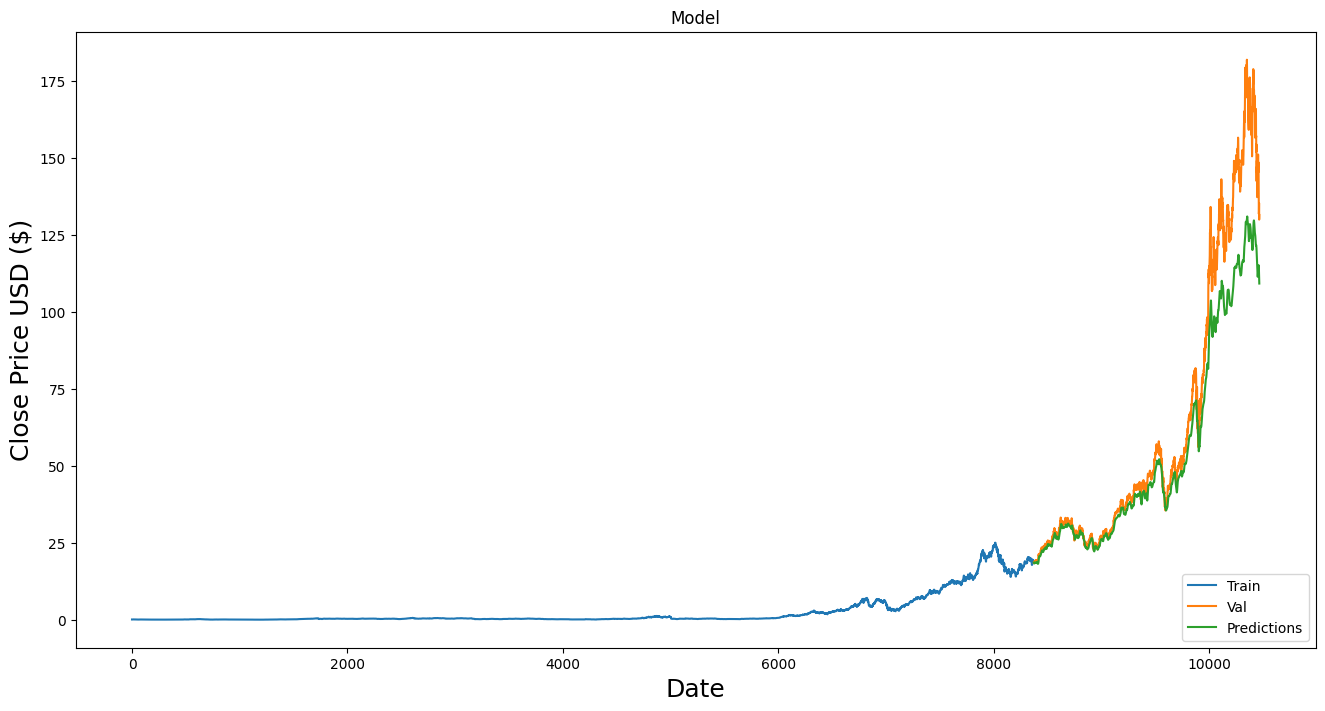

In [48]:
# Plot predictions
import matplotlib.pyplot as plt
train = train_df[:training_data_len]
valid = train_df[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()